# MODULES

In [2]:
import pandas as pd
import ipywidgets

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from datetime import datetime
from dateutil.relativedelta import relativedelta

import os
import time
import telebot

# INVESTING

In [249]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

def thousands(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fK' % (x*1e-3)

def draw_investing(percentage_turn=0.1, percentage_return=0.1, seed_money=0):
    salaries = [67860, 120000, 160000, 200000, 250000, 300000, 400000, 500000, 700000]
    data = pd.DataFrame()
    current_date = datetime.today()
    current_month = current_date.month
    current_year = current_date.year
    investing = 0
    month = 0
    x = []
    y = []
    percentage_turn = 0.1
    percentage_return = 0.1

    for salary in salaries:
        if current_month != -1:
            for _ in range(12 - current_month):
                investing = investing * (1 + percentage_return/12)
                investing = investing + (salaries[0] * percentage_turn)
                x.append(current_date + relativedelta(months=month))
                y.append(investing)
                month = month + 1
            current_month = -1
        else:
            for _ in range(12):
                investing = investing * (1 + percentage_return/12)
                investing = investing + (salary * percentage_turn)
                x.append(current_date + relativedelta(months=month))
                y.append(investing)
                month = month + 1

    if investing < 1000000:
        total = 'TOTAL INVESTING: ' + str(round(investing/1000, 2)) + 'K'
        formatter = FuncFormatter(thousands)
    else:
        total = 'TOTAL INVESTING: ' + str(round(investing/1000000, 2)) + 'M'
        formatter = FuncFormatter(millions)

    fig, ax = plt.subplots(figsize=(12,8))
    plt.grid(True, color='grey', linestyle='-', linewidth=0.5)
    plt.style.use('dark_background')
    plt.rcParams.update({'font.size': 12})
    plt.title('ANNUAL PERCENT: '+ str(int(percentage_return*100)) + ', ' + total, fontsize=20)
    plt.xlabel('DATE', fontsize=20)
    plt.ylabel('INVESTING', fontsize=20)
    plt.xlim(min(x),max(x))
    plt.ylim(min(y),max(y))
    plt.plot(x, y);
    plt.fill_between(x, y)
    ax.yaxis.set_major_formatter(formatter)

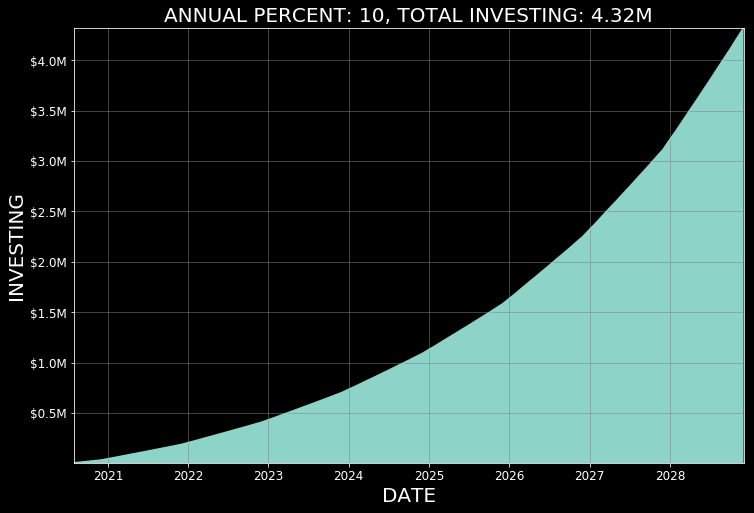

In [250]:
draw_investing()